# About the Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold. I will go through data exploration to identify the important features and to explore the correlation between features. After that I apply data normalization between variables and apply feature engineering. This dataset is available at Kaggle.

id - Unique ID for each home sold 

date - Date of the home sale 

price - Price of each home sold 

bedrooms - Number of bedrooms 

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

sqft_living - Square footage of the apartments interior living space 

sqft_lot - Square footage of the land space 

floors - Number of floors 

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

view - An index from 0 to 4 of how good the view of the property was 

condition - An index from 1 to 5 on the condition of the apartment, 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was initially built 

yr_renovated - The year of the house’s last renovation 

zipcode - What zipcode area the house is in 

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline

In [2]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [331]:
house_data.shape

(21613, 21)

This dataset has contain 21613 observations (rows) and 21 variables(columns.)

In [332]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [333]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here the date column is an object type. We need to change it to Datetime

# Data Cleaning

We will correct some of the inconsistencies in the data:

Data Type of house sold date will be changed to DateTime.

In [3]:
house_data['date'] = pd.to_datetime(house_data['date']).dt.date.astype('datetime64[ns]')

In [335]:
house_data.date.describe()

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Here we see that, the dataset contains information from May 2014 to May 2015.

In [4]:
house_data['year_sold'] = house_data['date'].dt.year
house_data['month_sold'] = house_data['date'].dt.strftime("%b") 

Since we have added year and month column separately, we can drop the date column from our data.

In [5]:
house_data.drop('date', axis = 1, inplace= True )

In [340]:
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,Oct
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,Dec
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,Feb
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,Dec
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,Feb


Ideally the sold year should be on or after the built year. 
Below we will check if there are any records where there is an inconsistency. 
In case the built year is after the sold year we will consider it as an error and Remove those columns.

In [341]:
house_data.loc[house_data.year_sold < house_data.yr_built]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
1763,1832100030,597326.0,4,4.00,3570,8250,2.0,0,0,3,...,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,Jun
2687,3076500830,385195.0,1,1.00,710,6000,1.5,0,0,3,...,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,Oct
7526,9520900210,614285.0,5,2.75,2730,6401,2.0,0,0,3,...,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,Dec
8039,1250200495,455000.0,2,1.50,1200,1259,2.0,0,0,3,...,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,Jun
14489,2770601530,500000.0,2,2.25,1570,1269,2.0,0,0,3,...,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,Aug
17098,9126100346,350000.0,3,2.00,1380,3600,3.0,0,0,3,...,0,2015,0,98122,47.6074,-122.305,1480,3600,2014,Jun
19805,9126100765,455000.0,3,1.75,1320,1014,3.0,0,0,3,...,0,2015,0,98122,47.6047,-122.305,1380,1495,2014,Aug
20770,9310300160,357000.0,5,2.50,2990,9240,2.0,0,0,3,...,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,Aug
20852,1257201420,595000.0,4,3.25,3730,4560,2.0,0,0,3,...,970,2015,0,98103,47.6725,-122.330,1800,4560,2014,Jul
20963,6058600220,230000.0,3,1.50,1040,1264,2.0,0,0,3,...,140,2015,0,98144,47.5951,-122.301,1350,3000,2014,Jul


In [6]:
house_data = house_data.loc[house_data.year_sold >= house_data.yr_built]

In [343]:
house_data.shape

(21601, 22)

Let's check if we have any missing values in our dataset.

In [ ]:
house_data.isnull().sum()

We dont have any missing data in this dataset.

# Understanding distribution of price

In [344]:
house_data.price.describe().apply(lambda x: '%.3f' % x)

count      21601.000
mean      540129.494
std       367215.257
min        75000.000
25%       321500.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: object

The Average price for houses is 540129.494 with minimum price as 75000 and maximum price as 7700000. The standard deviation and the maximum price indicates about few outliers in the data.
Let's visualize the price

In [7]:
norm = np.random.normal(0, 1,len(house_data))
norm.sort()

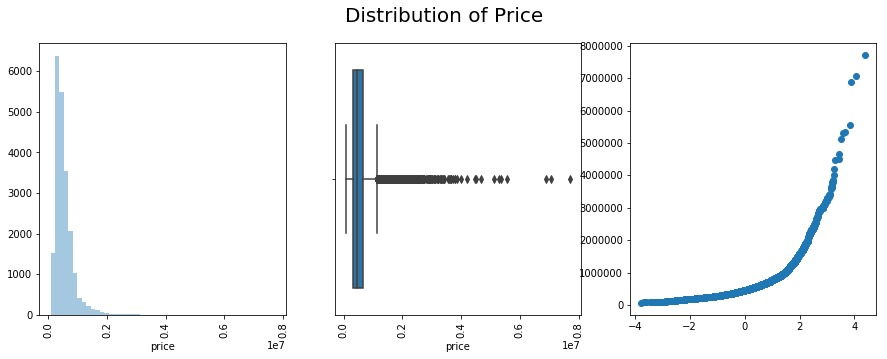

In [8]:
plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Price', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['price'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['price'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['price'])
plt.plot(norm, price,"o") 

plt.show()

The price shows positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:

In [347]:
print("Skewness: %f" % house_data['price'].skew())
print("Kurtosis: %f" % house_data['price'].kurt())

Skewness: 4.023115
Kurtosis: 34.568522


# Let's analyse the distribution of sqft_living

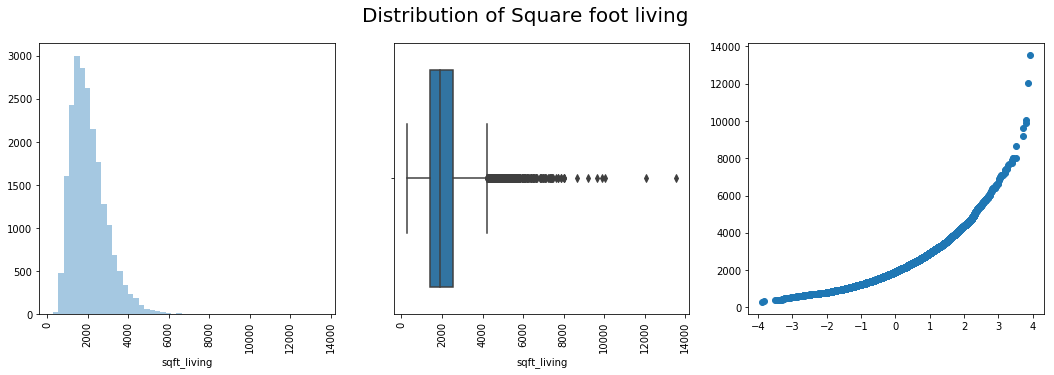

In [385]:
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Square foot living', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['sqft_living'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['sqft_living'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['sqft_living'])
plt.plot(norm, price,"o") 

plt.show()


# Let's analyse the distribution of sqft_lot

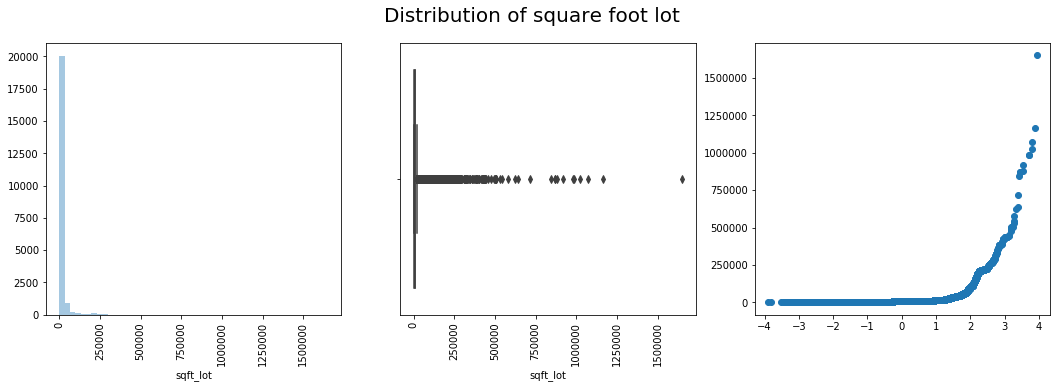

In [386]:
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of square foot lot', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['sqft_lot'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['sqft_lot'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['sqft_lot'])
plt.plot(norm, price,"o") 

plt.show()


# Let's analyse the distribution of total sqft 

In [28]:
house_data['total_sqft'] = house_data['sqft_living'] + house_data['sqft_lot']

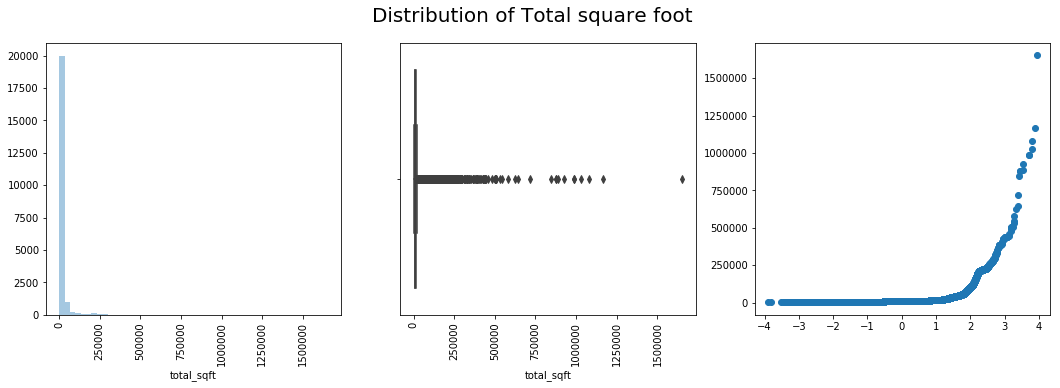

In [387]:

plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Total square foot', fontsize=20)
plt.subplot(1,3,1)
sns.distplot( house_data['total_sqft'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(house_data['total_sqft'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
price = sorted(house_data['total_sqft'])
plt.plot(norm, price,"o") 

plt.show()

In [352]:
house_data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year_sold          int64
month_sold        object
total_sqft         int64
dtype: object

# Analyze the correlation between two continuous variables.

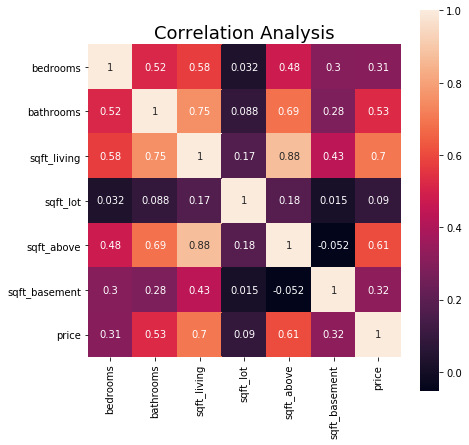

In [393]:
numerical_vars = [ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',  'price']
plt.figure(figsize=(7, 7))
plt.title('Correlation Analysis', fontsize=18)
sns.heatmap( house_data[numerical_vars].corr(), annot=True , square=True)

 .00-.19 “very weak”
 .20-.39 “weak”
 .40-.59 “moderate”
 .60-.79 “strong”
 .80-1.0 “very strong”
# is the category about the strength of correlation correct ?
Price is highly correlated with sqft_living and sqft_above, moderately correlated with number of bathrooms, and weak positive relation with bedrooms and sqft_basement.
sqft_living is highly correlated with bathrooms, sqft_above and moderately correlated with sqft_basement.
sqft_above is highly correlated with sqft_living.
# Which of above variables should be considered to club together (PCA) ?
is it ok to combine sqft_living-bathroom-sqft_above?
or we can drop the sqft_above and sqft_basement as these two addup to make sqft_living?

# Categorical with Continuous variable

Let's analyse if having a waterfront influence the price of the house.

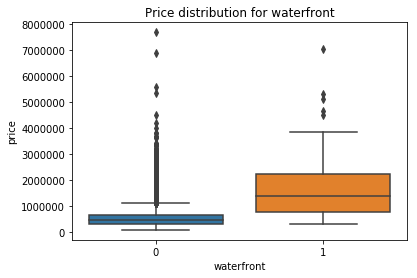

t-Test values :  Ttest_indResult(statistic=-40.614746474305335, pvalue=0.0)


In [395]:
plt.title('Price distribution for waterfront')
sns.boxplot(x='waterfront', y='price', data=house_data)
plt.show()
print('t-Test values : ',stats.ttest_ind(
        house_data[house_data['waterfront'] == 0]['price'],
        house_data[house_data['waterfront'] == 1]['price']))

# here p value is 0. can we go ahead rejecting null hypothesis and conclude that there is a significant difference or we need to find the corr ? 

In [179]:
print('Correlation between waterfront and price : ',house_data['waterfront'].corr(house_data['price']))

Correlation between waterfront and price :  0.266369434031


This shows a weak positive correlation.

view, grade and conditions seems to be rating scales.

In [472]:
df = house_data.loc[:,['grade', 'view','condition','price']]
df_long = pd.melt(df, id_vars=['price'])
df_grp = df_long.groupby(['variable','value'])['price'].mean().reset_index()
df_grp

,variable,value,price
0,condition,1,3.344317e+05
1,condition,2,3.272871e+05
2,condition,3,5.420779e+05
3,condition,4,5.212004e+05
4,condition,5,6.124181e+05
5,grade,1,1.420000e+05
6,grade,3,2.056667e+05
7,grade,4,2.143810e+05
8,grade,5,2.485240e+05
9,grade,6,3.018788e+05


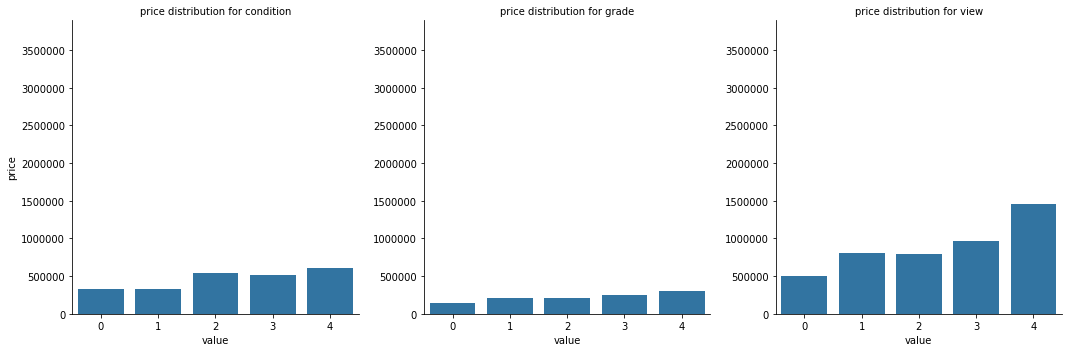

In [474]:
g = sns.FacetGrid(df_grp, col="variable", size=5)
g = g.map(sns.barplot, "value", "price" )
g.set_titles( col_template = 'price distribution for {col_name}')
plt.tight_layout()
plt.show()

# Why the above takes only few values for grade ?

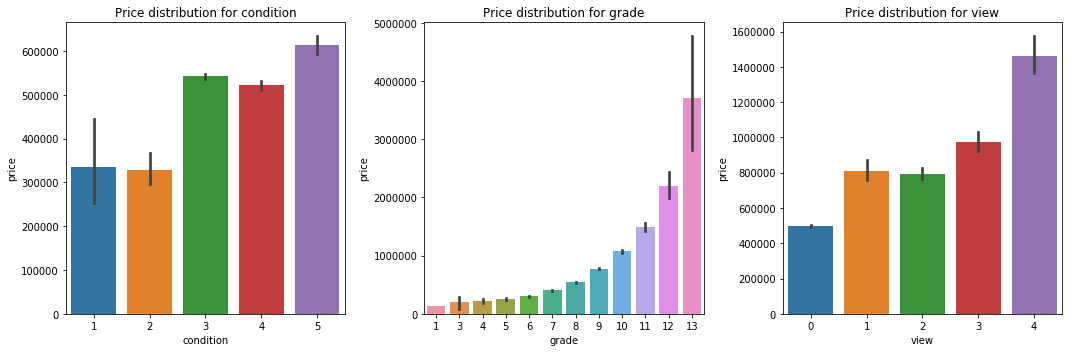

In [449]:
column_list = ['condition', 'grade','view']
j=1 
plt.figure(figsize=(15,5))
for i in column_list:
    plt.subplot(1,3,j)
    sns.barplot(x=i,y='price', data = house_data)
    plt.title('Price distribution for '+ i)
    j = j +1
    plt.tight_layout()


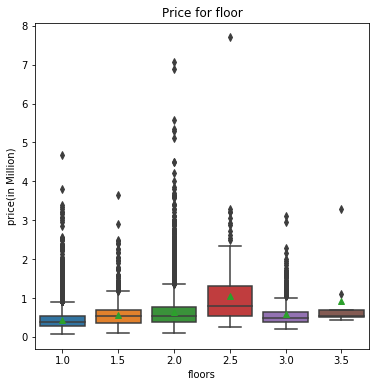

In [450]:
house_data['price(in Million)'] = house_data.price/1000000
plt.figure(figsize=(6,6))
plt.title('Price for floor')
sns.boxplot(x = 'floors',
          y = 'price(in Million)',showmeans = True,
          data = house_data)

plt.show()

The median price increases upto floor 2.5 and reduces when the number of floors goes from 2.5 to 3 or 3.5. In fact, the mean price for the houses with 3.5 floors is outside the distribution, as it is greately influenced by the outliers.

In [18]:
print('Correlation between Grade and price : ',house_data['grade'].corr(house_data['price']))
print('Correlation between view and price : ',house_data['view'].corr(house_data['price']))
print('Correlation between condition and price : ',house_data['condition'].corr(house_data['price']))
print('Correlation between floor and price : ',house_data['floors'].corr(house_data['price']))

Correlation between Grade and price :  0.66743425602
Correlation between view and price :  0.397293488295
Correlation between condition and price :  0.036361789129
Correlation between floor and price :  0.256793887551


The grade of the house is highly correlated with the price and view of the house is moderately correlated with the price.
floor and price are weakly correlated.

# Feature engineering


# Creating new variables

# Feature 1:
The year in which the house is built. It is not a continuous variable and if we use it as a categorical variable, it will create several categories. And there might not have much information about the categories. But what we can do it, we can calcuate the age of the house, by calculating the difference between the year it is sold and the year it is built.

In [36]:
# Creating a data frame to hold our features.
features = house_data.loc[:,['price','bathrooms','sqft_living','sqft_above','grade','yr_built','sqft_lot']]
features.head()

,price,bathrooms,sqft_living,sqft_above,grade,yr_built,sqft_lot
0,221900.0,1.00,1180,1180,7,1955,5650
1,538000.0,2.25,2570,2170,7,1951,7242
2,180000.0,1.00,770,770,6,1933,10000
3,604000.0,3.00,1960,1050,7,1965,5000
4,510000.0,2.00,1680,1680,8,1987,8080


In [37]:
features['age'] = house_data['year_sold'] - house_data['yr_built']

In [16]:
print(features['age'].unique())

[ 59  63  82  49  28  13  19  52  55  12  50  72  87  37 115  36  20  98
  93  46  67  29  73  99 105  66  10  11   9  85  33  84  81 110  18  14
  30   0  92  62  64  34  88   6  24  60  41  35  89  25  43  58  74  22
  51  53   8  26  75  68  48  39 104  31 114   4  69  65  90  27 101  47
  54 109   7  61  15  38  16 113  21  94  45 100 111  96  97  86 103  78
  77  76 107  40  57 102  17  71   1  23  91  42  95   2  32   3  56  70
  44 112   5  80  83 106 108  79]


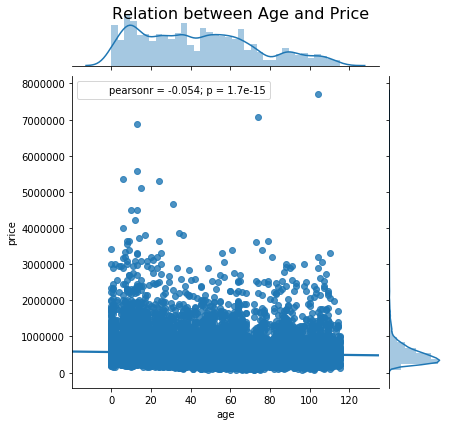

In [17]:
sns.jointplot(x="age", y="price", data=features, kind = 'reg')
plt.suptitle('Relation between Age and Price', fontsize=16)

plt.show()

price is declining with the age of the house, but not greatly. 

# How to do this ?
My assumption is :
the grade which is measurement of construction quality, should improve with yr_built. The newly built houses will have better construction quality than before, so a higher grade. so age should have negative correlation with condition and grade.

In [327]:
rated_vars = house_data.loc[:,['condition', 'grade','yr_built','age']]
print(rated_vars.corr())

           condition     grade  yr_built       age
condition   1.000000 -0.144491 -0.361158  0.360405
grade      -0.144491  1.000000  0.446806 -0.447258
yr_built   -0.361158  0.446806  1.000000 -0.999873
age         0.360405 -0.447258 -0.999873  1.000000


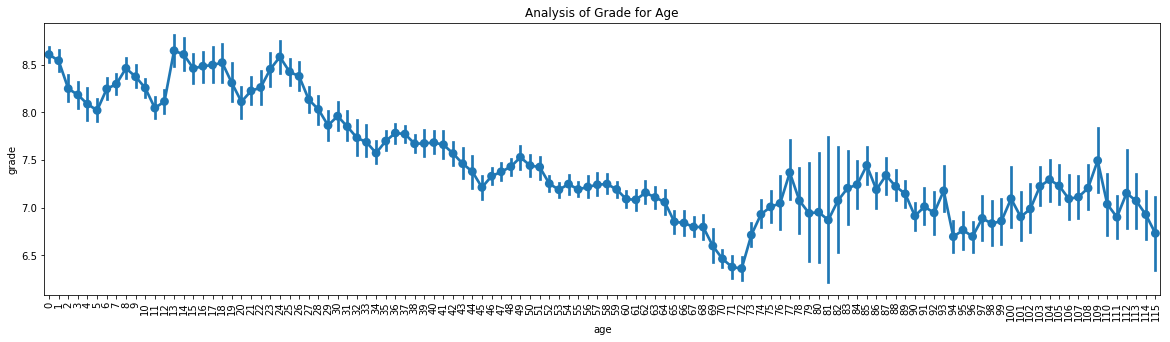

In [475]:
'''
house_data.condition.unique()
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 
7 has an average level of construction and design, 
and 11-13 have a high quality level of construction and design. 
'''
plt.figure(figsize=(20,5))
plt.title('Analysis of Grade for Age')
plt.xticks(rotation=90)
sns.pointplot(data= house_data, x= 'age', y = 'grade')
plt.show()

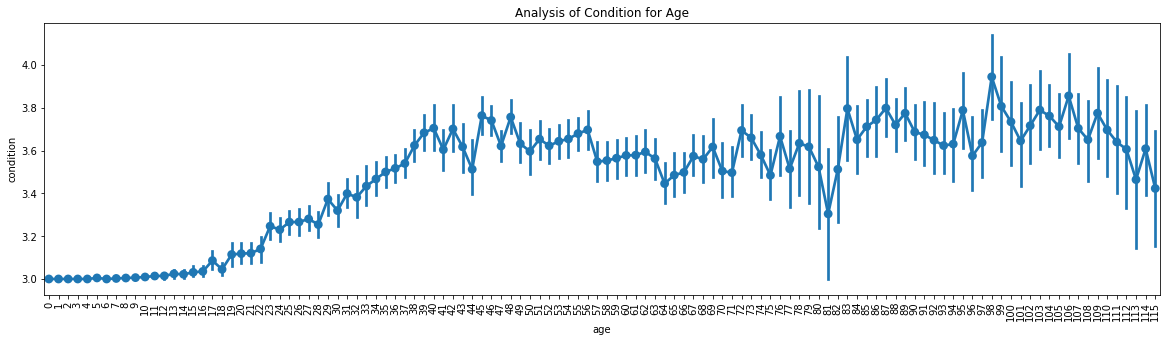

In [476]:
plt.figure(figsize=(20,5))
plt.title('Analysis of Condition for Age')
plt.xticks(rotation=90)
sns.pointplot(data= house_data, x= 'age', y = 'condition')
plt.show()

# Feature 2

Is the house renovated influences the price?

In [38]:
features['is_renovated'] = np.where(house_data.loc[:,'yr_renovated'] != 0 , 1, 0)

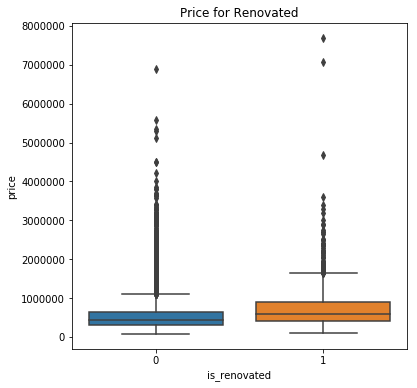

In [19]:
plt.figure(figsize= (6,6))
sns.boxplot(x= 'is_renovated', y= 'price', data = features)
plt.title('Price for Renovated')
plt.show()

price increases if it is a renovated house, but not significantly.

# Feature 3

Let's analyse the trend of price per sqft living for the past months. We can get the price per sqft living by dividing the price by sqft_living. 

In [39]:
# price_sqft_living
features['price_sqft_living'] = house_data.price/house_data.sqft_living
house_data['price_sqft_living'] = house_data.price/house_data.sqft_living

In [23]:
features.head()

,price,bathrooms,sqft_living,sqft_above,grade,yr_built,age,is_renovated,price_sqft_living
0,221900.0,1.00,1180,1180,7,1955,59,0,188.050847
1,538000.0,2.25,2570,2170,7,1951,63,1,209.338521
2,180000.0,1.00,770,770,6,1933,82,0,233.766234
3,604000.0,3.00,1960,1050,7,1965,49,0,308.163265
4,510000.0,2.00,1680,1680,8,1987,28,0,303.571429


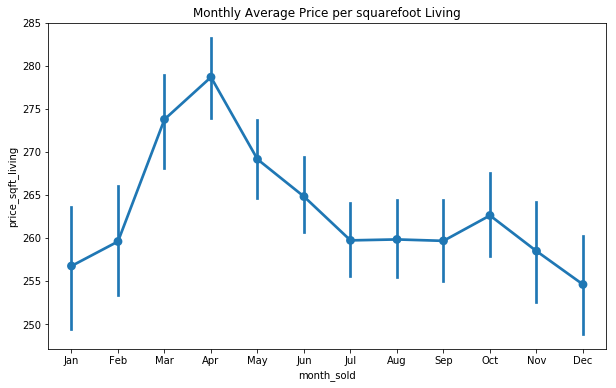

In [24]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'month_sold', y = 'price_sqft_living', data= house_data, 
              order=['Jan', 'Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'] )
plt.title('Monthly Average Price per squarefoot Living')
plt.show()

prices increase from January till April and then it started declining till September. Again it went up in October which again starts falling.

# Feature 4

Let's analyse the trend of price per sqft lot for the past months. We can get the price per sqft lot by dividing the price by sqft_lot. 

In [40]:
#price_sqft_lot
features['price_sqft_lot'] = house_data.price/house_data.sqft_lot
house_data['price_sqft_lot'] = house_data.price/house_data.sqft_lot

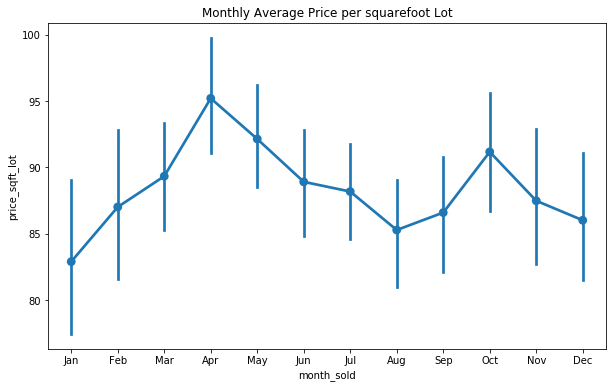

In [26]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'month_sold', y = 'price_sqft_lot', data= house_data, 
              order=['Jan', 'Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']  )
plt.title('Monthly Average Price per squarefoot Lot')
plt.show()

This also has the same trend like the sqft living.

Lets combine the above two features.

# Feature 5
Let's take the average price per total sqft. Total Sqft is sqft living and sqft lot. we call it Average price per sqft. Then analyse the trend of Average price per sqft for the past months. 

In [41]:
house_data['Average_price_per_sqft'] = house_data.price / house_data['total_sqft']
features['Average_price_per_sqft'] = house_data.price / house_data['total_sqft']

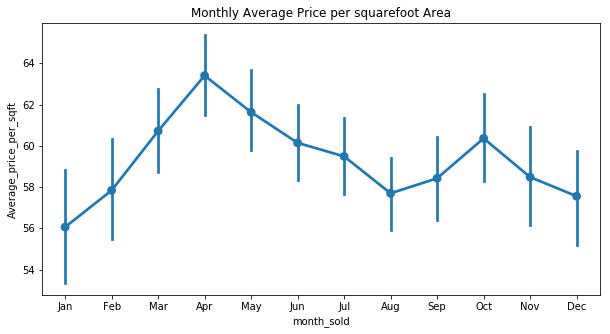

In [30]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'month_sold', y = 'Average_price_per_sqft', data= house_data, 
              order=['Jan', 'Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']  )
plt.title('Monthly Average Price per squarefoot Area')
plt.show()

prices increase from January till April and then it started declining till September. Again it went up in October and then starts falling.

Let's analyse the trend of Average price per sqft for the past months of last 2 years. 

In [31]:
house_data['month_yr_sold'] = house_data.month_sold.astype(str) + '' + house_data.year_sold.astype(str)
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,year_sold,month_sold,age,price_sqft_living,price_sqft_lot,total_sqft,Average_price_per_sqft,month_yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,2014,Oct,59,188.050847,39.274336,6830,32.489019,Oct2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,2014,Dec,63,209.338521,74.288870,9812,54.830819,Dec2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2015,Feb,82,233.766234,18.000000,10770,16.713092,Feb2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,2014,Dec,49,308.163265,120.800000,6960,86.781609,Dec2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2015,Feb,28,303.571429,63.118812,9760,52.254098,Feb2015


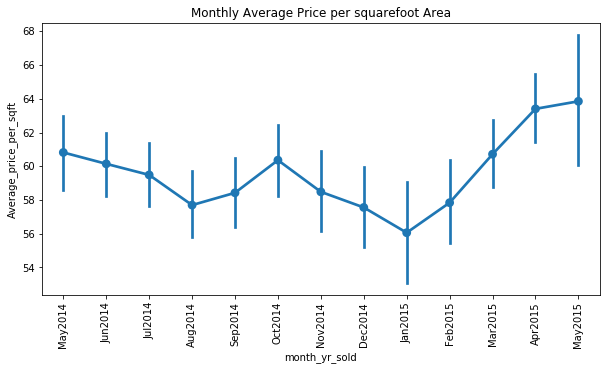

In [32]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'month_yr_sold', y = 'Average_price_per_sqft', data= house_data, 
              order=['May2014','Jun2014', 'Jul2014','Aug2014','Sep2014','Oct2014','Nov2014','Dec2014','Jan2015', 'Feb2015','Mar2015','Apr2015','May2015']  )
plt.title('Monthly Average Price per squarefoot Area')
plt.xticks(rotation=90)
plt.show()

From January 2015 onwards the price is increasing gradually.

# Feature 6
Dealing with non-normality

Let's normalise the price by taking a log transformation of this. 

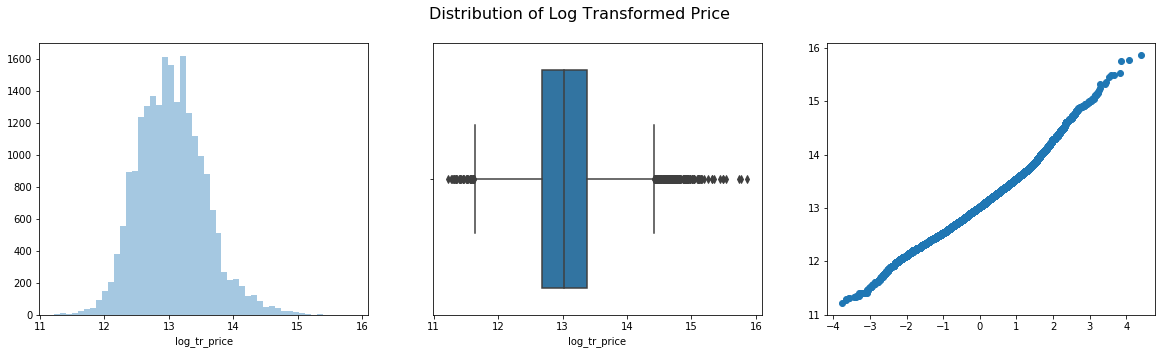

In [42]:
features['log_tr_price'] = np.log(features['price'])
plt.figure(figsize=(20,5))
plt.suptitle('Distribution of Log Transformed Price', fontsize=16)
plt.subplot(1,3,1)
sns.distplot(features['log_tr_price'], kde= False)
plt.subplot(1,3,2)
sns.boxplot(features['log_tr_price'])
plt.subplot(1,3,3)
plt.plot(norm, sorted(features['log_tr_price']),"o") 

plt.show()

# Feature 8

Let's normalise the sqft_living by taking a log transformation of this. 
Then we will analyse its relation with log transfomed price.

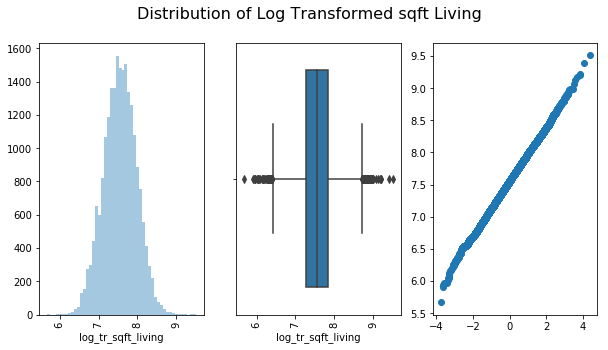

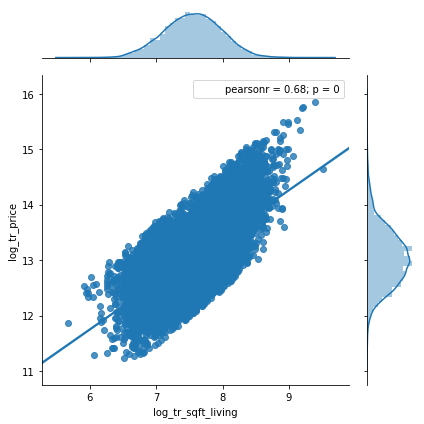

In [43]:
features['log_tr_sqft_living'] = np.log(features['sqft_living'])
plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Log Transformed sqft Living', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_sqft_living'], kde= False)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(features['log_tr_sqft_living'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_sqft_living'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_sqft_living", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()
plt.show()

Now there is a nice linear relationship between the features log transformed sqft living and log transformed price.

# Feature 9

Let's normalise the sqft_lot by taking a log transformation of this. 
Then we will analyse its relation with log transfomed price.

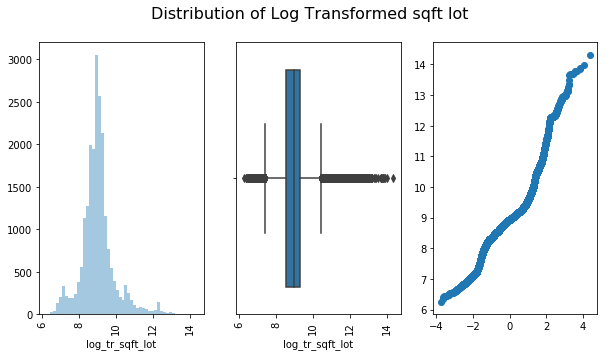

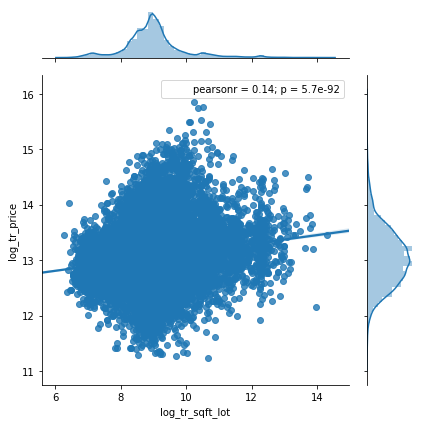

In [44]:
features['log_tr_sqft_lot'] = np.log(features['sqft_lot'])
plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Log Transformed sqft lot', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_sqft_lot'], kde= False)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(features['log_tr_sqft_lot'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_sqft_lot'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_sqft_lot", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()
plt.show()

The correlation between log transformed sqft_lot and log transformed price is moderate positive. 
# this still does not follow a normal distribution ???

# Feature 10

Let's normalise the total_sqft by taking a log transformation of this. Then we will analyse its relation with log transfomed price.

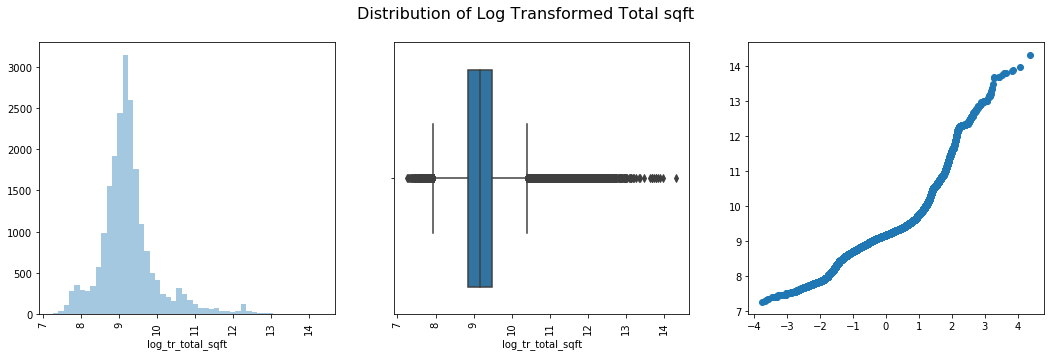

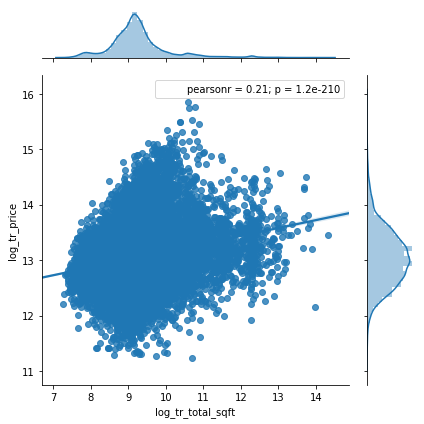

In [46]:
features['log_tr_total_sqft'] = np.log(house_data['total_sqft'])
plt.figure(figsize=(18,5))
plt.suptitle('Distribution of Log Transformed Total sqft', fontsize=16)
plt.subplot(1,3,1)
sns.distplot( features['log_tr_total_sqft'], kde= False)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(features['log_tr_total_sqft'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sqft_living = sorted(features['log_tr_total_sqft'])
plt.plot(norm, sqft_living,"o") 

sns.jointplot(x="log_tr_total_sqft", y="log_tr_price", data=features, kind = 'reg')
plt.tight_layout()

plt.show()

The correlation between log transformed total_sqft and log transformed price is moderate positive. 
# this still does not follow a normal distribution ???

# Feature

which year the house was built and it is in what condition when sold
# Shall we consider reversing the condition (new house should be in better condition )

In [47]:
features['age_x_cond']= house_data['age'] * house_data['condition']

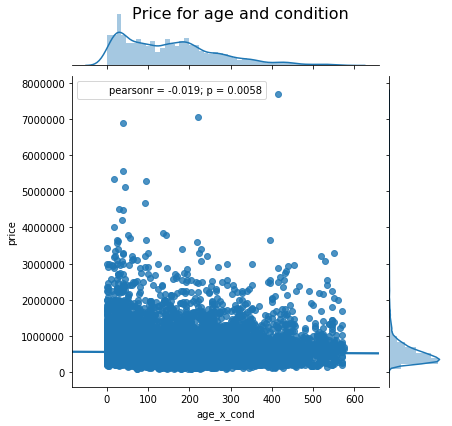

In [48]:
sns.jointplot(x="age_x_cond", y="price", data=features, kind = 'reg')
plt.suptitle('Price for age and condition', fontsize=16)
plt.show()

In [74]:
features.shape

(21601, 17)

# PCA

Let's reduce the number of features. Since Price will be our outcome variable, we won't include it in the dimension reduction analysis.

In [67]:
features_pca = features.loc[:,'bathrooms':]
features_pca.shape

(21601, 16)

In [68]:
# Normalize the data so that all variables have a mean of 0 and standard deviation # of 1. Then transpose it.
X = StandardScaler().fit_transform(features_pca)
Xt = X.T
Cx = np.cov(Xt)


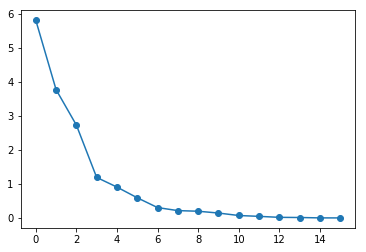

In [79]:
sklearn_pca = PCA(n_components=16)
Y_sklearn = sklearn_pca.fit_transform(X)

eig_vals = sklearn_pca.explained_variance_
eig_vecs = sklearn_pca.components_

plt.plot(eig_vals, marker='o')
plt.show()


In [77]:
ratios = sklearn_pca.explained_variance_ratio_
print(eig_vals)
print()
print(list(map((lambda x: '%.3f' % x),eig_vals )))
print()
print(ratios)
print()
print(list(map((lambda x: '%.3f' % x),ratios )))

[  5.80855760e+00   3.76902737e+00   2.72847978e+00   1.19031657e+00
   9.06090579e-01   5.91827908e-01   3.04294943e-01   2.14740318e-01
   1.96649702e-01   1.43260595e-01   7.12130177e-02   4.59301133e-02
   1.70820533e-02   1.21309074e-02   1.01352051e-03   1.25758075e-04]

['5.809', '3.769', '2.728', '1.190', '0.906', '0.592', '0.304', '0.215', '0.197', '0.143', '0.071', '0.046', '0.017', '0.012', '0.001', '0.000']

[  3.63018044e-01   2.35553306e-01   1.70522092e-01   7.43913418e-02
   5.66280395e-02   3.69875318e-02   1.90175535e-02   1.34206485e-02
   1.22900374e-02   8.95337266e-03   4.45060756e-03   2.87049919e-03
   1.06757890e-03   7.58146611e-04   6.33420996e-05   7.85951580e-06]

['0.363', '0.236', '0.171', '0.074', '0.057', '0.037', '0.019', '0.013', '0.012', '0.009', '0.004', '0.003', '0.001', '0.001', '0.000', '0.000']


It looks like there is a fairly steep cutoff after the 4th eigenvalue. If we use 4 of the principle components in our analysis, we will retain (.363+.236+.176+0.074) = 84% of the data. Let's see What do these components contain from the original information?

In [85]:
corrmat = features.corr()
print(corrmat.price.sort_values())

age                      -0.054157
age_x_cond               -0.018762
yr_built                  0.054216
sqft_lot                  0.089634
is_renovated              0.126075
log_tr_sqft_lot           0.161265
log_tr_total_sqft         0.220389
price_sqft_lot            0.308415
Average_price_per_sqft    0.421102
bathrooms                 0.525276
price_sqft_living         0.554937
sqft_above                0.605715
log_tr_sqft_living        0.611888
grade                     0.667739
sqft_living               0.702287
log_tr_price              0.891661
price                     1.000000
Name: price, dtype: float64
